| ISS Plotting | Plot the ISS On Map |
| ----------- | ----------- |

In [6]:
# libraries
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime
import time
from io import BytesIO
from PIL import Image
import numpy as np

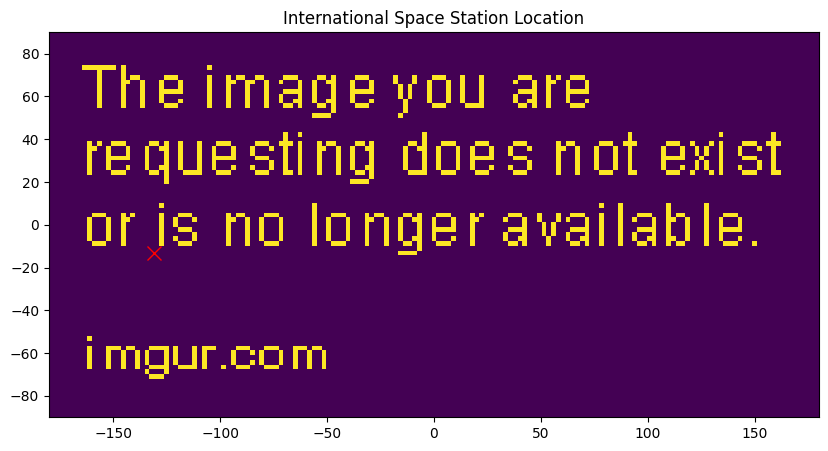

KeyboardInterrupt: 

In [8]:
def plot_iss_location():
    # Get the current location of the ISS from the Open Notify API
    response = requests.get("http://api.open-notify.org/iss-now.json")
    data = json.loads(response.content)
    latitude = float(data['iss_position']['latitude'])
    longitude = float(data['iss_position']['longitude'])

    # Set up the plot
    plt.figure(figsize=(10, 5))
    plt.title("International Space Station Location")

    # Load the map image from URL and convert it to a NumPy array
    url = 'https://i.imgur.com/dO37j0B.png'
    img_response = requests.get(url)
    img = Image.open(BytesIO(img_response.content))
    map_img = np.asarray(img)

    # Plot the map and the ISS location
    plt.imshow(map_img, extent=[-180, 180, -90, 90])
    plt.plot(longitude, latitude, 'rx', markersize=10)

    # Save the plot with a timestamp in the filename
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    # plt.savefig(f"iss_location_{timestamp}.png")
    plt.show()
    plt.close()

while True:
    plot_iss_location()
    time.sleep(60)